In [1]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = 'python'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from model import walk_forward_validation

Using TensorFlow backend.


In [4]:
data = pd.read_csv('./601988.SH.csv')
data.index = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data = data.loc[:, ['open', 'high', 'low', 'close', 'vol', 'amount']]
# data = pd.DataFrame(data, dtype=np.float64)
close = data.pop('close')
data.insert(5, 'close', close)
data1 = data.iloc[3501:, 5]
residuals = pd.read_csv('./ARIMA_residuals1.csv')
residuals.index = pd.to_datetime(residuals['trade_date'])
residuals.pop('trade_date')
merge_data = pd.merge(data, residuals, on='trade_date')
#merge_data = merge_data.drop(labels='2007-01-04', axis=0)
time = pd.Series(data.index[3501:])

In [5]:
Lt = pd.read_csv('./ARIMA.csv')
Lt = Lt.drop('trade_date', axis=1)
Lt = np.array(Lt)
Lt = Lt.flatten().tolist()

supervised_data       var1(t-6)  var2(t-6)  var3(t-6)   var4(t-6)    var5(t-6)  var6(t-6)  \
6          5.30       5.34       5.07  7867306.84  4050377.943       5.07   
7          4.87       5.14       4.83  5565756.49  2763751.983       5.08   
8          5.06       5.19       4.95  4334458.33  2198327.249       5.18   
9          5.25       5.29       5.05  3721171.25  1915221.182       5.10   
10         5.07       5.07       4.90  3274026.49  1625223.442       4.93   
...         ...        ...        ...         ...          ...        ...   
3675       3.13       3.16       3.13  1374157.76   432082.360       3.15   
3676       3.15       3.16       3.14  1560240.83   490908.221       3.15   
3677       3.14       3.15       3.12  1360415.16   426283.660       3.13   
3678       3.12       3.14       3.10  1500377.44   467690.817       3.10   
3679       3.10       3.11       3.04  2660491.55   820162.507       3.08   

      var7(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  ...    va

d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


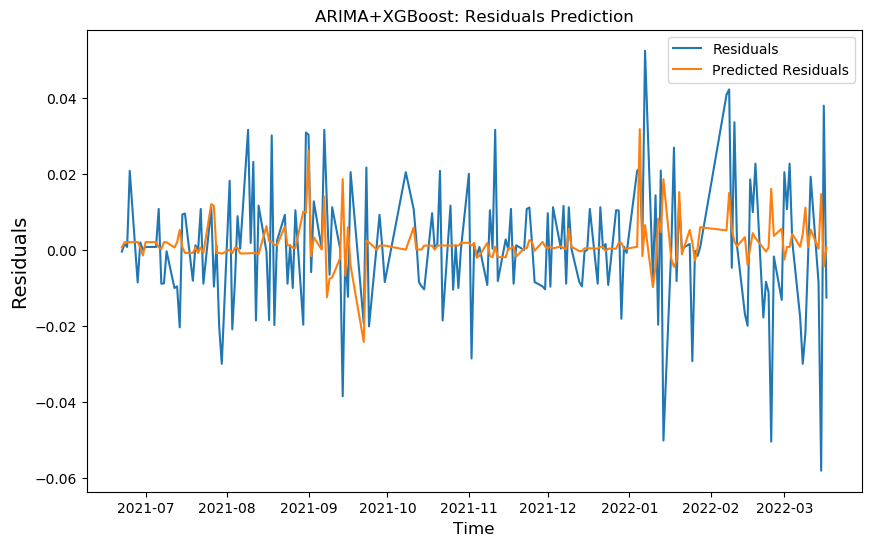

In [6]:
train, test = prepare_data(merge_data, n_test=180, n_in=6, n_out=1)

y, yhat = walk_forward_validation(train, test)
plt.figure(figsize=(10, 6))
plt.plot(time, y, label='Residuals')
plt.plot(time, yhat, label='Predicted Residuals')
plt.title('ARIMA+XGBoost: Residuals Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Residuals', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

MSE: 0.00031
RMSE: 0.01755
MAE: 0.01223
R2: 0.82405


d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
d:\code\Attention-CLX-stock-prediction\.venv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


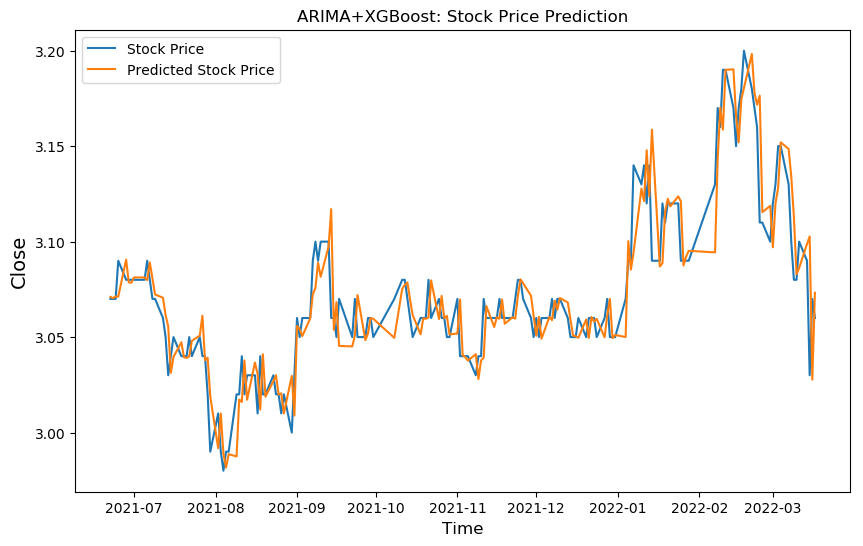

In [7]:
finalpredicted_stock_price = [i + j for i, j in zip(Lt, yhat)]
#print('final', finalpredicted_stock_price)
evaluation_metric(data1, finalpredicted_stock_price)
plt.figure(figsize=(10, 6))
plt.plot(time, data1, label='Stock Price')
plt.plot(time, finalpredicted_stock_price, label='Predicted Stock Price')
plt.title('ARIMA+XGBoost: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()